In [11]:
'''age - age in years
gender - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)'''

'age - age in years\ngender - (1 = male; 0 = female)\ncp - chest pain type\ntrestbps - resting blood pressure (in mm Hg on admission to the hospital)\nchol - serum cholestoral in mg/dl\nfbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\nrestecg - resting electrocardiographic results\nthalach - maximum heart rate achieved\nexang - exercise induced angina (1 = yes; 0 = no)\noldpeak - ST depression induced by exercise relative to rest\nslope - the slope of the peak exercise ST segment\nca - number of major vessels (0-3) colored by flourosopy\nthal - 3 = normal; 6 = fixed defect; 7 = reversable defect\ntarget - have disease or not (1=yes, 0=no)'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import seaborn as sns
#import random

In [13]:
data = pd.read_csv("heart.csv")

In [14]:
data.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
data.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
data.corr()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


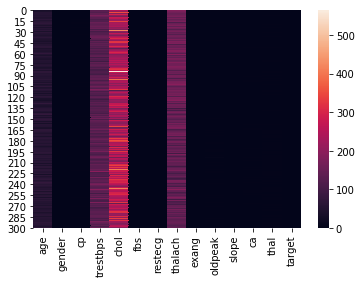

In [17]:
sns.heatmap(data)

In [18]:
data.cov()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.484558,-0.416661,-0.643499,44.495902,100.585076,0.392433,-0.555013,-82.903318,0.413022,2.214583,-0.944791,2.566356,0.378139,-1.021343
gender,-0.416661,0.217166,-0.023736,-0.463970,-4.780309,0.007475,-0.014261,-0.469871,0.031014,0.051993,-0.008819,0.056357,0.059930,-0.065307
cp,-0.643499,-0.023736,1.065132,0.861714,-4.113774,0.034719,0.024108,6.991618,-0.191168,-0.178821,0.076137,-0.191080,-0.102201,0.223330
trestbps,44.495902,-0.463970,0.861714,307.586453,111.967215,1.109042,-1.052324,-18.759131,0.557111,3.934486,-1.312832,1.818373,0.668022,-1.267950
chol,100.585076,-4.780309,-4.113774,111.967215,2686.426748,0.245427,-4.116703,-11.800494,1.631991,3.246794,-0.128964,3.737252,3.135488,-2.203855
fbs,0.392433,0.007475,0.034719,1.109042,0.245427,0.126877,-0.015769,-0.069897,0.004295,0.002377,-0.013147,0.050259,-0.006983,-0.004983
restecg,-0.555013,-0.014261,0.024108,-1.052324,-4.116703,-0.015769,0.276528,0.531462,-0.017474,-0.035883,0.030151,-0.038741,-0.003858,0.035998
thalach,-82.903318,-0.469871,6.991618,-18.759131,-11.800494,-0.069897,0.531462,524.646406,-4.076290,-9.153518,5.459369,-4.993235,-1.352491,4.818766
exang,0.413022,0.031014,-0.191168,0.557111,1.631991,0.004295,-0.017474,-4.076290,0.220707,0.157216,-0.074618,0.055603,0.059472,-0.102354
oldpeak,2.214583,0.051993,-0.178821,3.934486,3.246794,0.002377,-0.035883,-9.153518,0.157216,1.348095,-0.413219,0.264396,0.149462,-0.249452


age


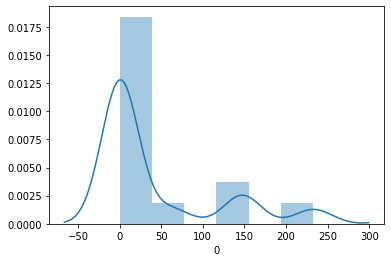

gender


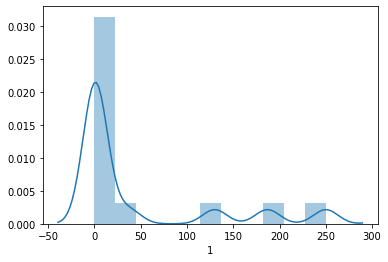

cp


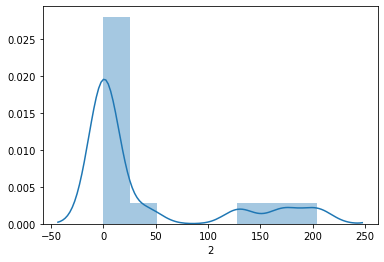

trestbps


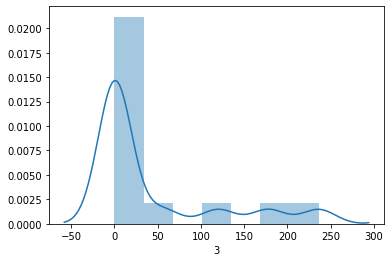

chol


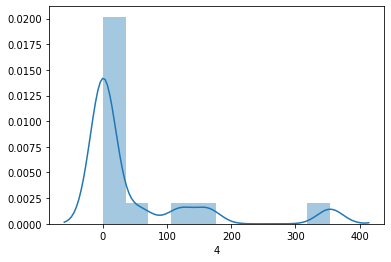

fbs


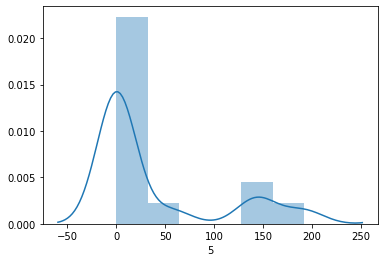

restecg


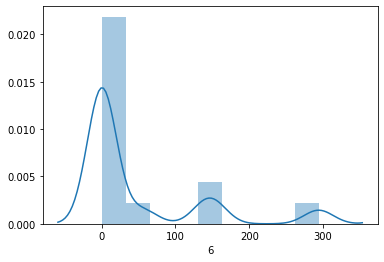

thalach


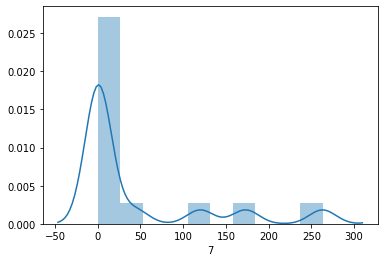

exang


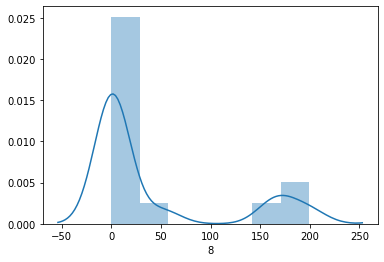

oldpeak


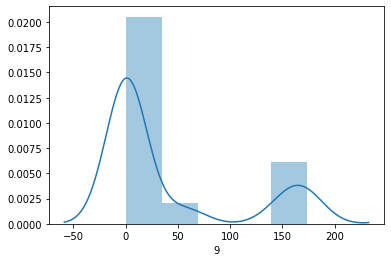

slope


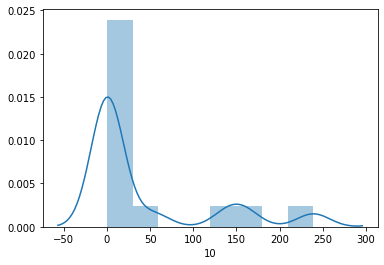

ca


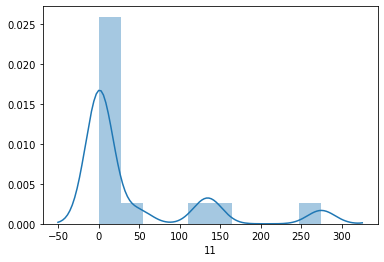

thal


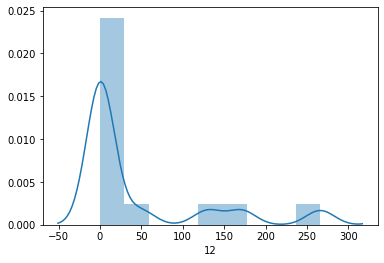

target


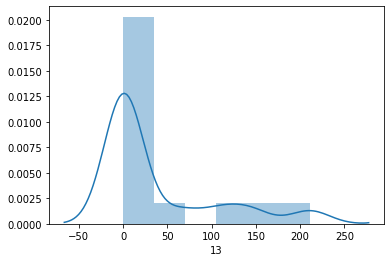

IndexError: index 14 is out of bounds for axis 0 with size 14

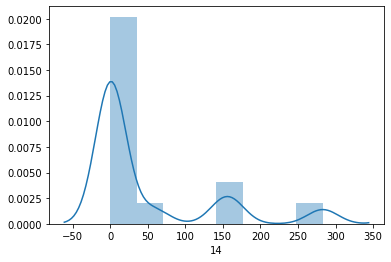

In [19]:
for i in range(len(data)-1):
    sns.distplot(data.iloc[i])
    print(data.columns[i])
    plt.show()

In [ ]:
data.plot()

In [ ]:
sns.pairplot(data)

In [ ]:
mean_target = data['target'].mean()

NameError: name 'mean_target' is not defined

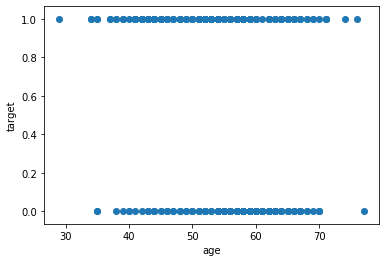

In [20]:
l = data.columns
for i in l[:-1]:
    #print(i)
    plt.scatter(data[i],data['target'])
    plt.xlabel(i)
    plt.ylabel('target')
    plt.axhline(mean_target,color='k')
    plt.show()

In [21]:
x = data.iloc[:,0:13]
y = data.iloc[:,13]

In [22]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [23]:
x.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [26]:
x_train

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2


In [27]:
x_test 

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
207,60,0,0,150,258,0,0,157,0,2.6,1,2,3
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2


In [28]:
y_train

63     1
256    0
166    0
203    0
300    0
      ..
257    0
229    0
292    0
157    1
287    0
Name: target, Length: 203, dtype: int64

In [29]:
y_test

123    1
5      1
207    0
43     1
106    1
      ..
137    1
238    0
250    0
264    0
132    1
Name: target, Length: 100, dtype: int64

# SVM


In [30]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(x_train,y_train)

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [32]:
from sklearn.model_selection import cross_val_score,cross_val_predict
svc_acc = cross_val_score(svc_classifier, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, x_train_std, y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
y_pred=svc_classifier.predict(x_test)

In [34]:
print("actual values:\n")
print(y_test.values)

actual values:

[1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1]


In [35]:
print("predicted values:\n")
print(y_pred)

predicted values:

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [36]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 64.000000
Recall score : 100.000000
ROC score : 53.846154

[[ 3 36]
 [ 0 61]]


# KNN

In [37]:
from sklearn import neighbors

In [38]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
y_pred=clf.predict(x_test)

In [40]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1]


In [41]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1]


In [42]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 61.000000
Recall score : 70.491803
ROC score : 58.322825

[[18 21]
 [18 43]]


In [43]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)
clf_acc = cross_val_score(clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
clf_proba = cross_val_predict(clf, x_train_std, y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] 

# DECISION TREE

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
dtc_clf_acc = cross_val_score(dtc_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, x_train_std, y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]

In [46]:
y_pred=dtc_clf.predict(x_test)

In [47]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1]


In [48]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1]


In [49]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 74.000000
Recall score : 78.688525
ROC score : 72.677596

[[26 13]
 [13 48]]


# RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=5, random_state=0)
rmf_clf = rmf.fit(x_train, y_train)

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
rmf_clf_acc = cross_val_score(rmf_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, x_train_std, y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]

In [52]:
y_pred=rmf_clf.predict(x_test)

In [53]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1]


In [54]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1
 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1]


In [55]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 76.000000
Recall score : 73.770492
ROC score : 76.628836

[[31  8]
 [16 45]]


In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_acc = cross_val_score(lr, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, x_train_std, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
y_pred=lr.predict(x_test)

In [58]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1]


In [59]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1]


In [60]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 85.000000
Recall score : 85.245902
ROC score : 84.930643

[[33  6]
 [ 9 52]]


 # Naive Bayes Classification

In [79]:
from sklearn.naive_bayes import GaussianNB
nb_classifier =GaussianNB()
nb_classifier.fit(x_train, y_train)
nb_acc = cross_val_score(nb_classifier, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
nb_proba = cross_val_predict(nb_classifier, x_train_std, y_train, cv=3, method='predict_proba')
nb_scores = nb_proba[:, 1]
nb_proba

array([[1.23519342e-01, 8.76480658e-01],
       [9.99991416e-01, 8.58410885e-06],
       [9.99977333e-01, 2.26666241e-05],
       [9.98660236e-01, 1.33976353e-03],
       [9.99924791e-01, 7.52091293e-05],
       [2.39086523e-02, 9.76091348e-01],
       [1.14292116e-02, 9.88570788e-01],
       [1.13022396e-01, 8.86977604e-01],
       [2.94794111e-03, 9.97052059e-01],
       [4.52195361e-01, 5.47804639e-01],
       [4.00584690e-02, 9.59941531e-01],
       [9.99870623e-01, 1.29377403e-04],
       [1.41984474e-01, 8.58015526e-01],
       [1.74369475e-01, 8.25630525e-01],
       [1.72626110e-01, 8.27373890e-01],
       [9.85911726e-01, 1.40882740e-02],
       [4.60369276e-02, 9.53963072e-01],
       [5.85397488e-03, 9.94146025e-01],
       [3.58675199e-03, 9.96413248e-01],
       [9.99291022e-01, 7.08978278e-04],
       [7.80591934e-01, 2.19408066e-01],
       [9.99999083e-01, 9.16968776e-07],
       [5.13019046e-01, 4.86980954e-01],
       [9.49454235e-01, 5.05457654e-02],
       [1.587509

In [62]:
y_pred=nb_classifier.predict(x_test)

In [63]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1]


In [64]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1
 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1]


In [65]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 83.000000
Recall score : 80.327869
ROC score : 83.753678

[[34  5]
 [12 49]]


In [66]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (kNN): 0.88 


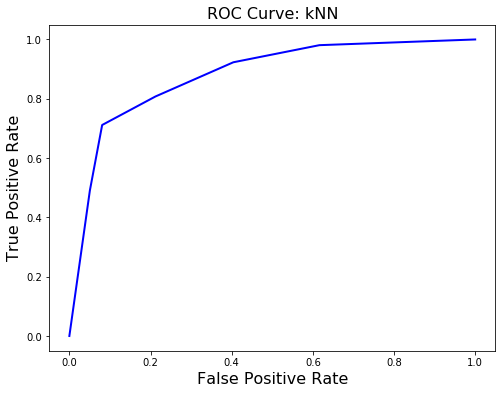

AUC Score (Logistic Regression): 0.91 


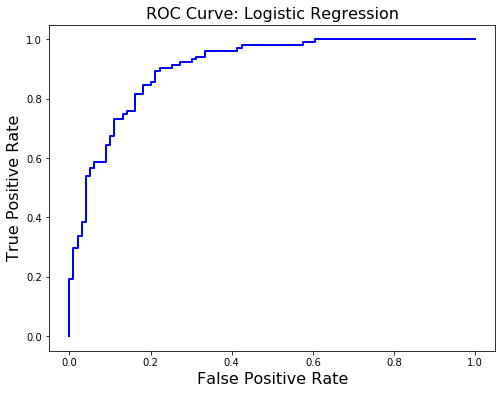

AUC Score (Naive Bayes): 0.89 


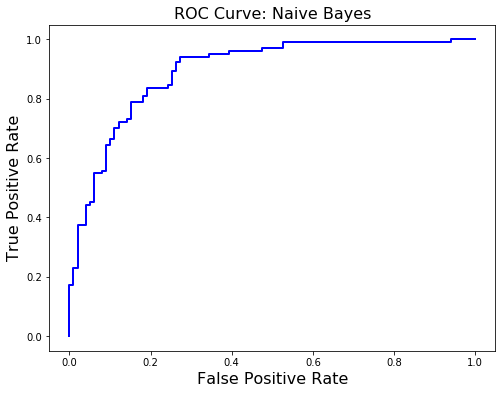

AUC Score (Support Vector Classification): 0.89 


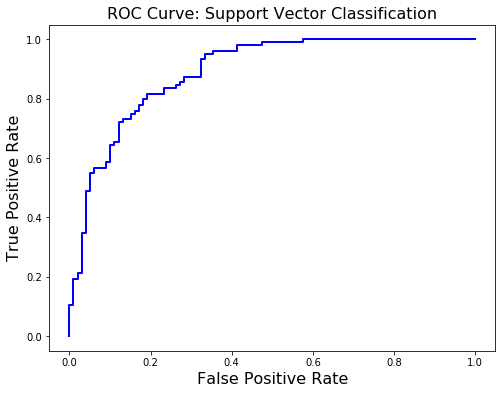

AUC Score (Decision Tree Classifier): 0.75 


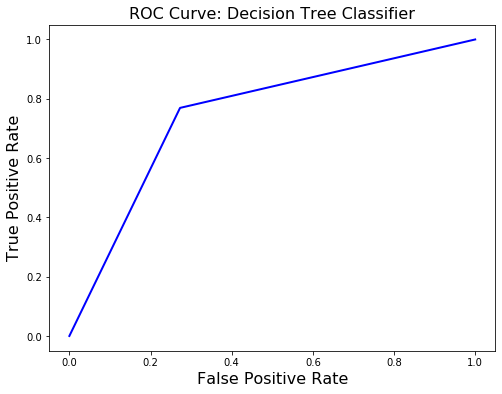

AUC Score (Random Forest Classifier): 0.89 


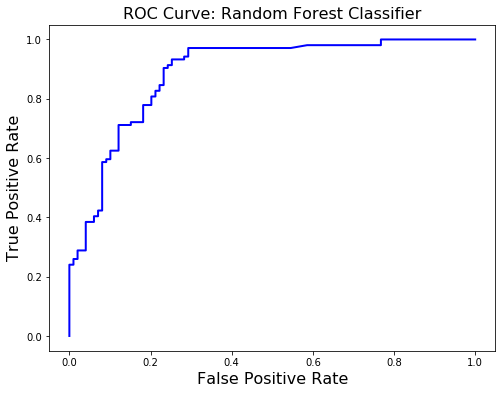

In [67]:
ROC_curve('kNN', y_train, clf_scores)
ROC_curve('Logistic Regression', y_train, lr_scores)
ROC_curve('Naive Bayes',y_train,nb_scores)
ROC_curve('Support Vector Classification',y_train,svc_scores)
ROC_curve('Decision Tree Classifier',y_train,dtc_clf_scores)
ROC_curve('Random Forest Classifier',y_train,rmf_clf_scores)

In [68]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
#model = keras.models.Sequential()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Instructions for updating:
non-resource variables are not supported in the long term


In [69]:
x_train = keras.utils.normalize(x_train,axis=1)
x_test = keras.utils.normalize(x_test,axis=1)

In [70]:
'''model.add(keras.layers.Flatten(input_shape = data.shape))
model.add(keras.layers.Dense(128,activation = tf.nn.relu))
model.add(keras.layers.Dense(2,activation = tf.nn.softmax))'''

'model.add(keras.layers.Flatten(input_shape = data.shape))\nmodel.add(keras.layers.Dense(128,activation = tf.nn.relu))\nmodel.add(keras.layers.Dense(2,activation = tf.nn.softmax))'

In [71]:
from tensorflow.keras.layers import Dense
classifier = keras.models.Sequential()
classifier.add(Dense(303, activation='relu', kernel_initializer='random_normal', input_dim=13))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [72]:
classifier.compile(optimizer ='sgd',loss='binary_crossentropy', metrics =['accuracy'])
classifier.fit(x_train,y_train, batch_size=10, epochs=100)

Train on 203 samples
Epoch 1/100
203/203 [==============================] - 1s 7ms/sample - loss: 0.6933 - acc: 0.4926
Epoch 2/100
203/203 [==============================] - 0s 516us/sample - loss: 0.6932 - acc: 0.5025
Epoch 3/100
203/203 [==============================] - 0s 408us/sample - loss: 0.6932 - acc: 0.5123
Epoch 4/100
203/203 [==============================] - 0s 540us/sample - loss: 0.6932 - acc: 0.5123
Epoch 5/100
203/203 [==============================] - 0s 442us/sample - loss: 0.6931 - acc: 0.5123
Epoch 6/100
203/203 [==============================] - 0s 403us/sample - loss: 0.6932 - acc: 0.5123
Epoch 7/100
203/203 [==============================] - 0s 423us/sample - loss: 0.6931 - acc: 0.5123
Epoch 8/100
203/203 [==============================] - 0s 393us/sample - loss: 0.6931 - acc: 0.5123
Epoch 9/100
203/203 [==============================] - 0s 418us/sample - loss: 0.6931 - acc: 0.5123
Epoch 10/100
203/203 [==============================] - 0s 560us/sample - loss: 0

203/203 [==============================] - 0s 477us/sample - loss: 0.6930 - acc: 0.5123
Epoch 83/100
203/203 [==============================] - 0s 472us/sample - loss: 0.6930 - acc: 0.5123
Epoch 84/100
203/203 [==============================] - 0s 383us/sample - loss: 0.6930 - acc: 0.5123
Epoch 85/100
203/203 [==============================] - 0s 423us/sample - loss: 0.6930 - acc: 0.5123
Epoch 86/100
203/203 [==============================] - 0s 560us/sample - loss: 0.6929 - acc: 0.5123
Epoch 87/100
203/203 [==============================] - 0s 531us/sample - loss: 0.6930 - acc: 0.5123
Epoch 88/100
203/203 [==============================] - 0s 452us/sample - loss: 0.6929 - acc: 0.5123
Epoch 89/100
203/203 [==============================] - 0s 354us/sample - loss: 0.6929 - acc: 0.5123
Epoch 90/100
203/203 [==============================] - 0s 388us/sample - loss: 0.6930 - acc: 0.5123
Epoch 91/100
203/203 [==============================] - 0s 388us/sample - loss: 0.6930 - acc: 0.5123
Epo

In [73]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

203/203 [==============================] - 0s 231us/sample - loss: 0.6928 - acc: 0.5123


[0.6928461901660036, 0.5123153]

In [74]:
y_pred=classifier.predict(x_test)

In [75]:
y_pred

array([[0.5117396 ],
       [0.5117004 ],
       [0.511716  ],
       [0.5117233 ],
       [0.51170653],
       [0.51172584],
       [0.5117097 ],
       [0.511746  ],
       [0.5117259 ],
       [0.5117061 ],
       [0.51173574],
       [0.5117282 ],
       [0.5117268 ],
       [0.51174283],
       [0.5117263 ],
       [0.5117128 ],
       [0.5117145 ],
       [0.5117296 ],
       [0.51171654],
       [0.5117094 ],
       [0.5117385 ],
       [0.5117114 ],
       [0.5117226 ],
       [0.5117215 ],
       [0.5117354 ],
       [0.51171714],
       [0.51171434],
       [0.51173615],
       [0.5117467 ],
       [0.51172394],
       [0.51172996],
       [0.5117116 ],
       [0.51170665],
       [0.5117067 ],
       [0.51171345],
       [0.5117012 ],
       [0.5117226 ],
       [0.51171535],
       [0.51171166],
       [0.5117279 ],
       [0.51173604],
       [0.5117054 ],
       [0.5117385 ],
       [0.51171607],
       [0.5117277 ],
       [0.51171905],
       [0.5117375 ],
       [0.511